In [60]:
import pandas as pd

In [61]:
import numpy as np

In [62]:
df=pd.read_csv('C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/College_Data', index_col=0)

In [63]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [64]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [65]:
df.columns
import matplotlib.pyplot as plt
%matplotlib inline

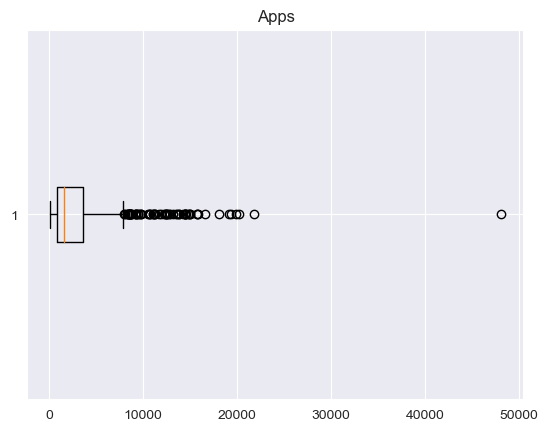

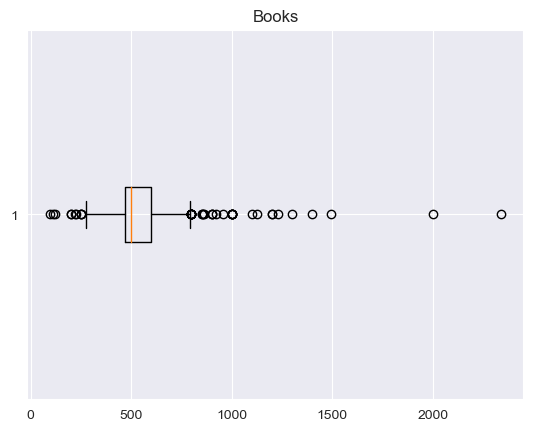

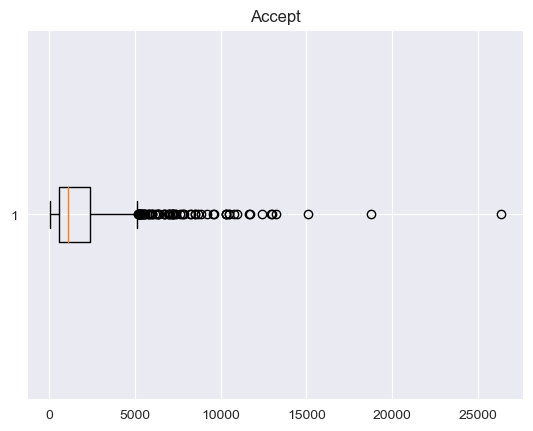

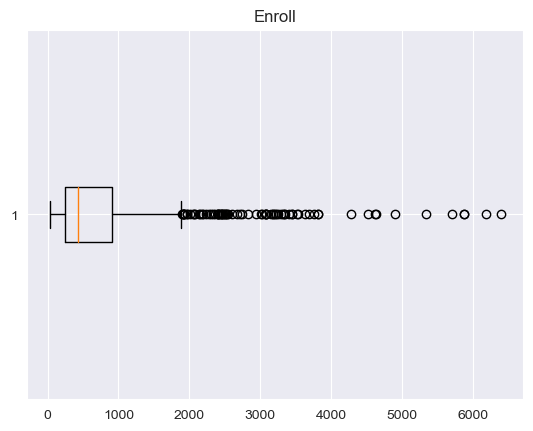

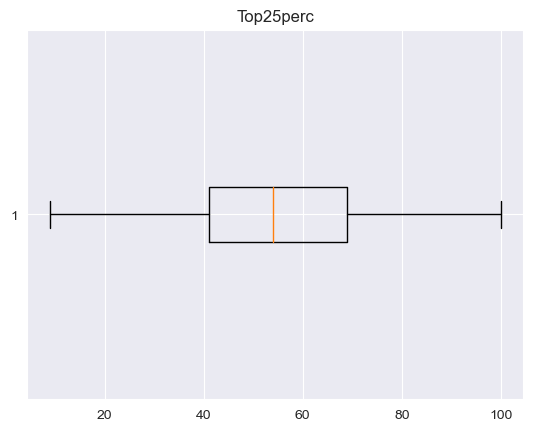

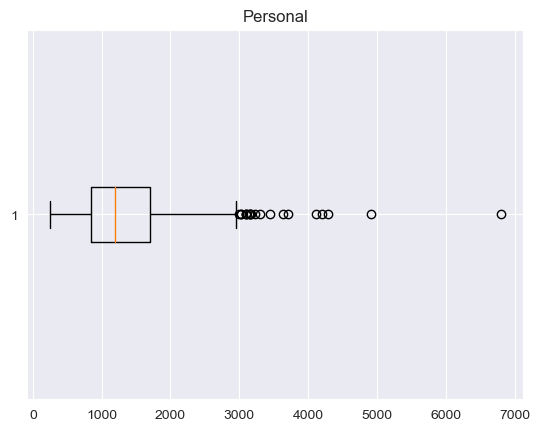

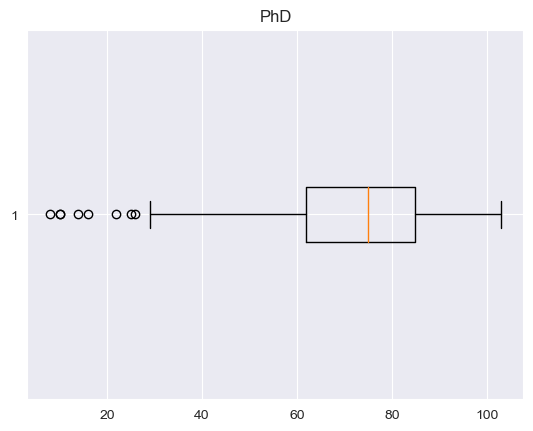

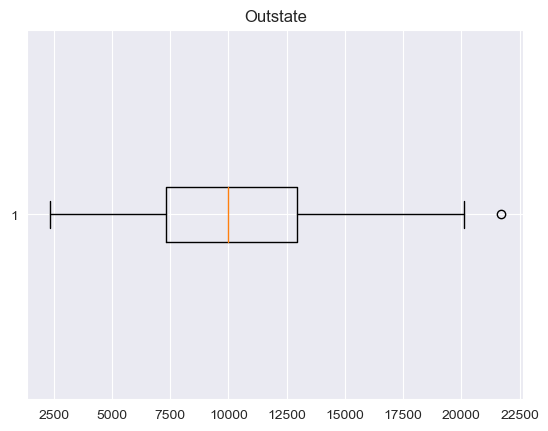

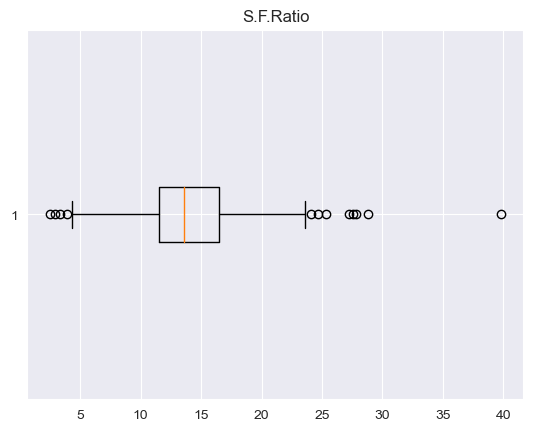

In [66]:
col_num=['Apps', 'Books', 'Accept', 'Enroll', 'Top25perc', 'Personal', 'PhD', 'Outstate', 'S.F.Ratio']

for col in df[col_num]:
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()

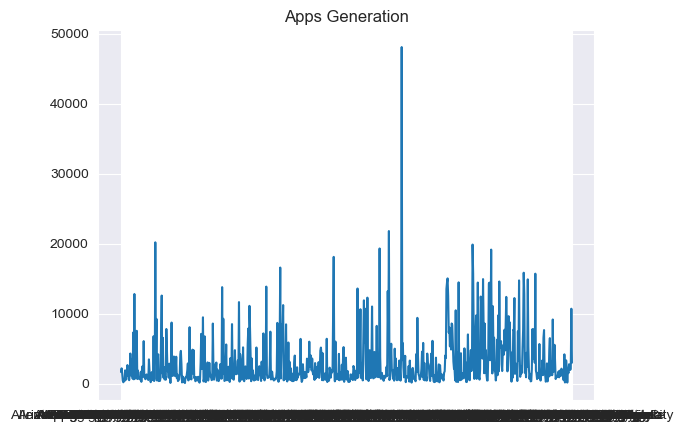

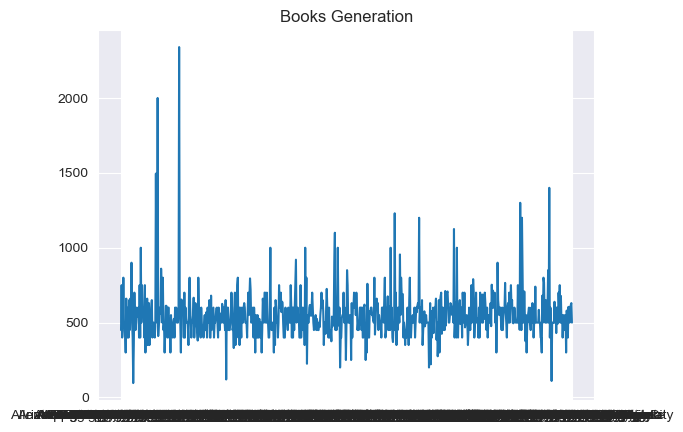

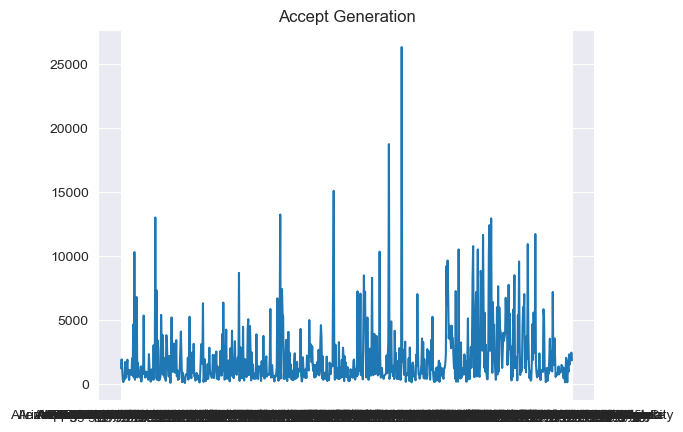

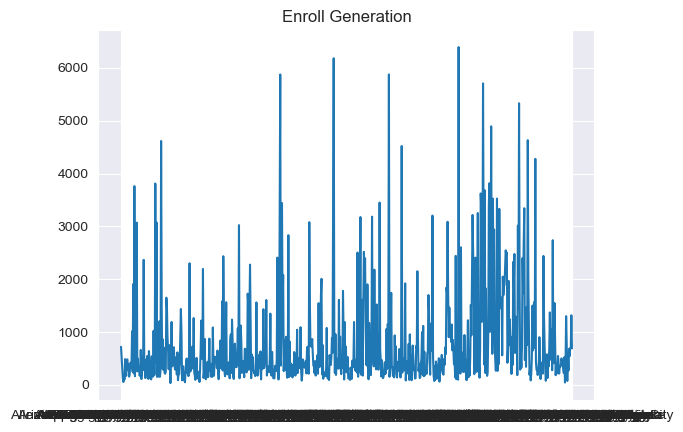

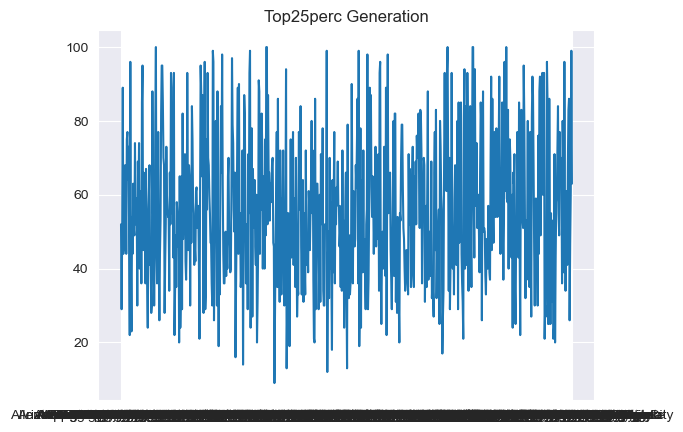

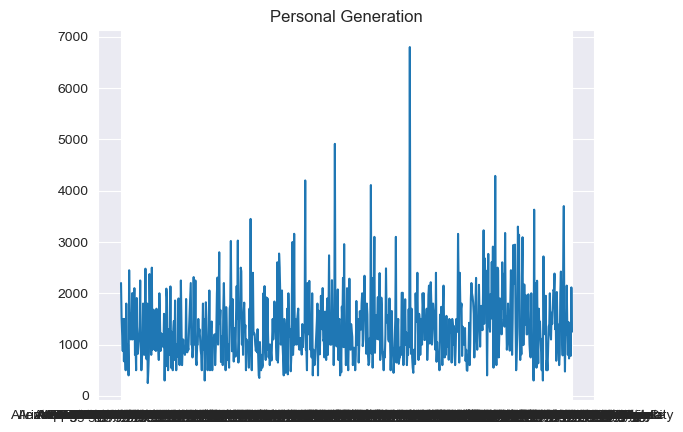

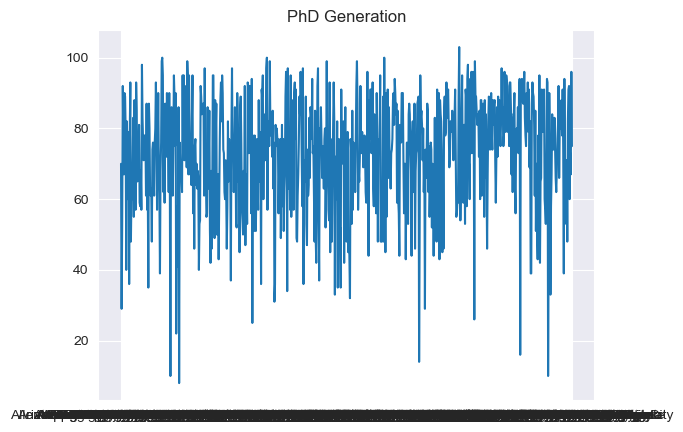

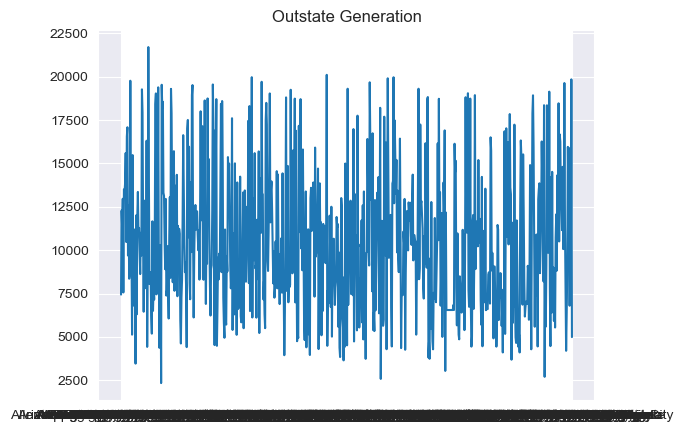

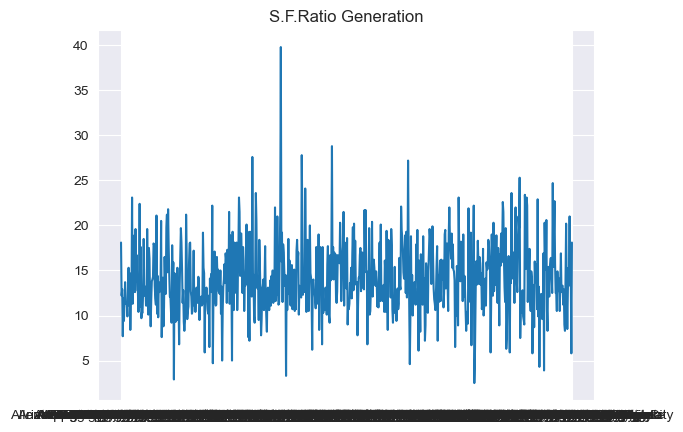

In [67]:
for i in col_num:
    plt.plot(df[i])
    plt.title(i + ' Generation')
    plt.show()

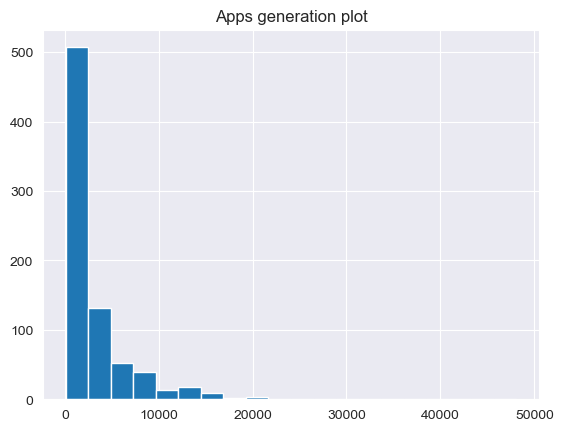

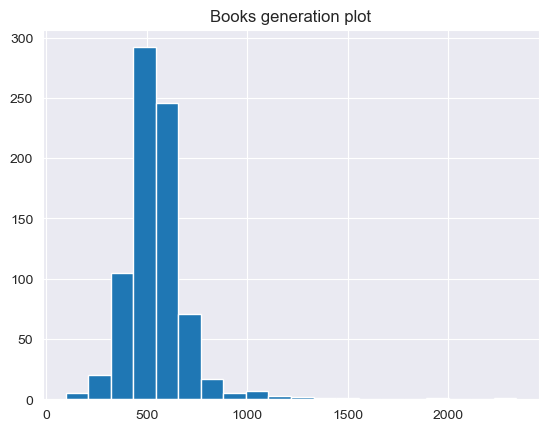

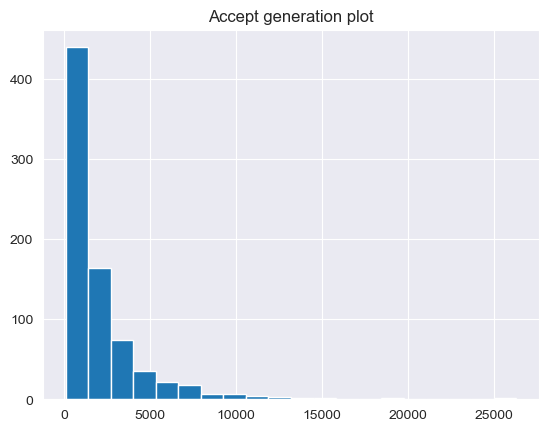

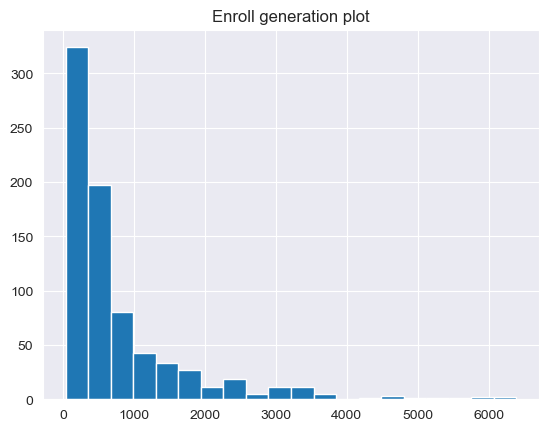

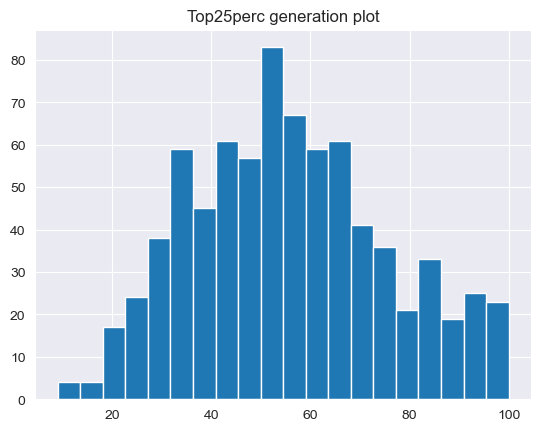

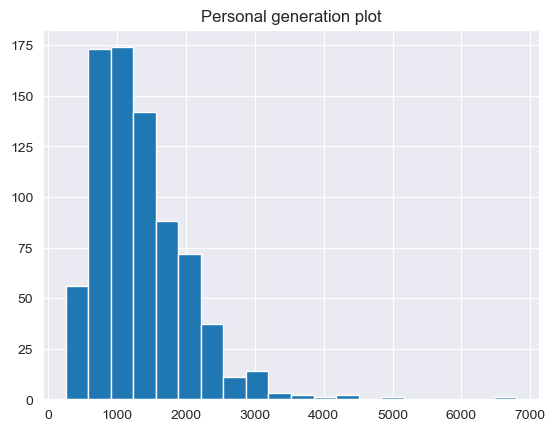

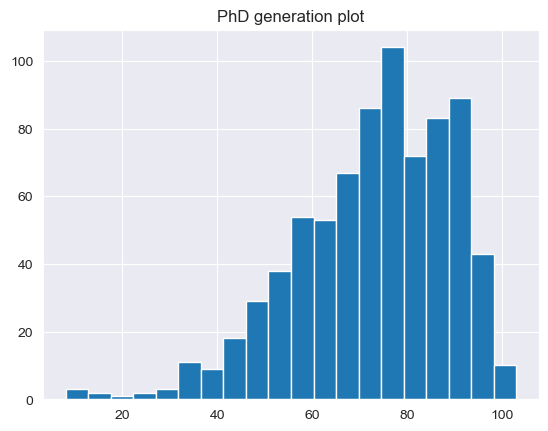

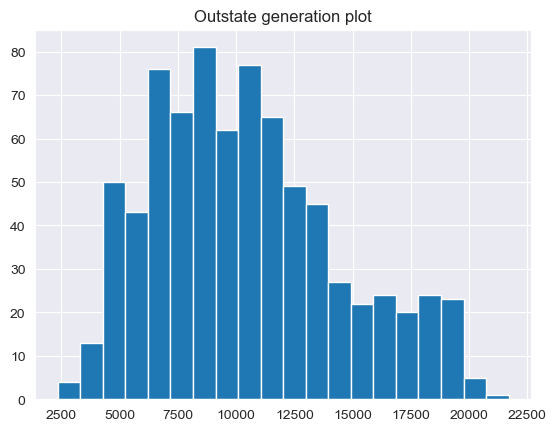

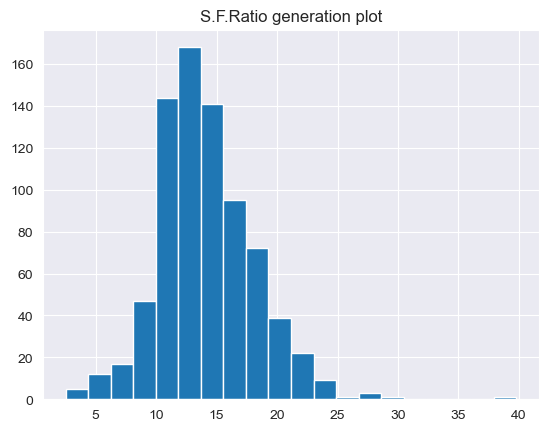

In [68]:
for a in col_num:
    plt.hist(df[a], bins =20)
    plt.title(a + ' generation plot')
    plt.show()

c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


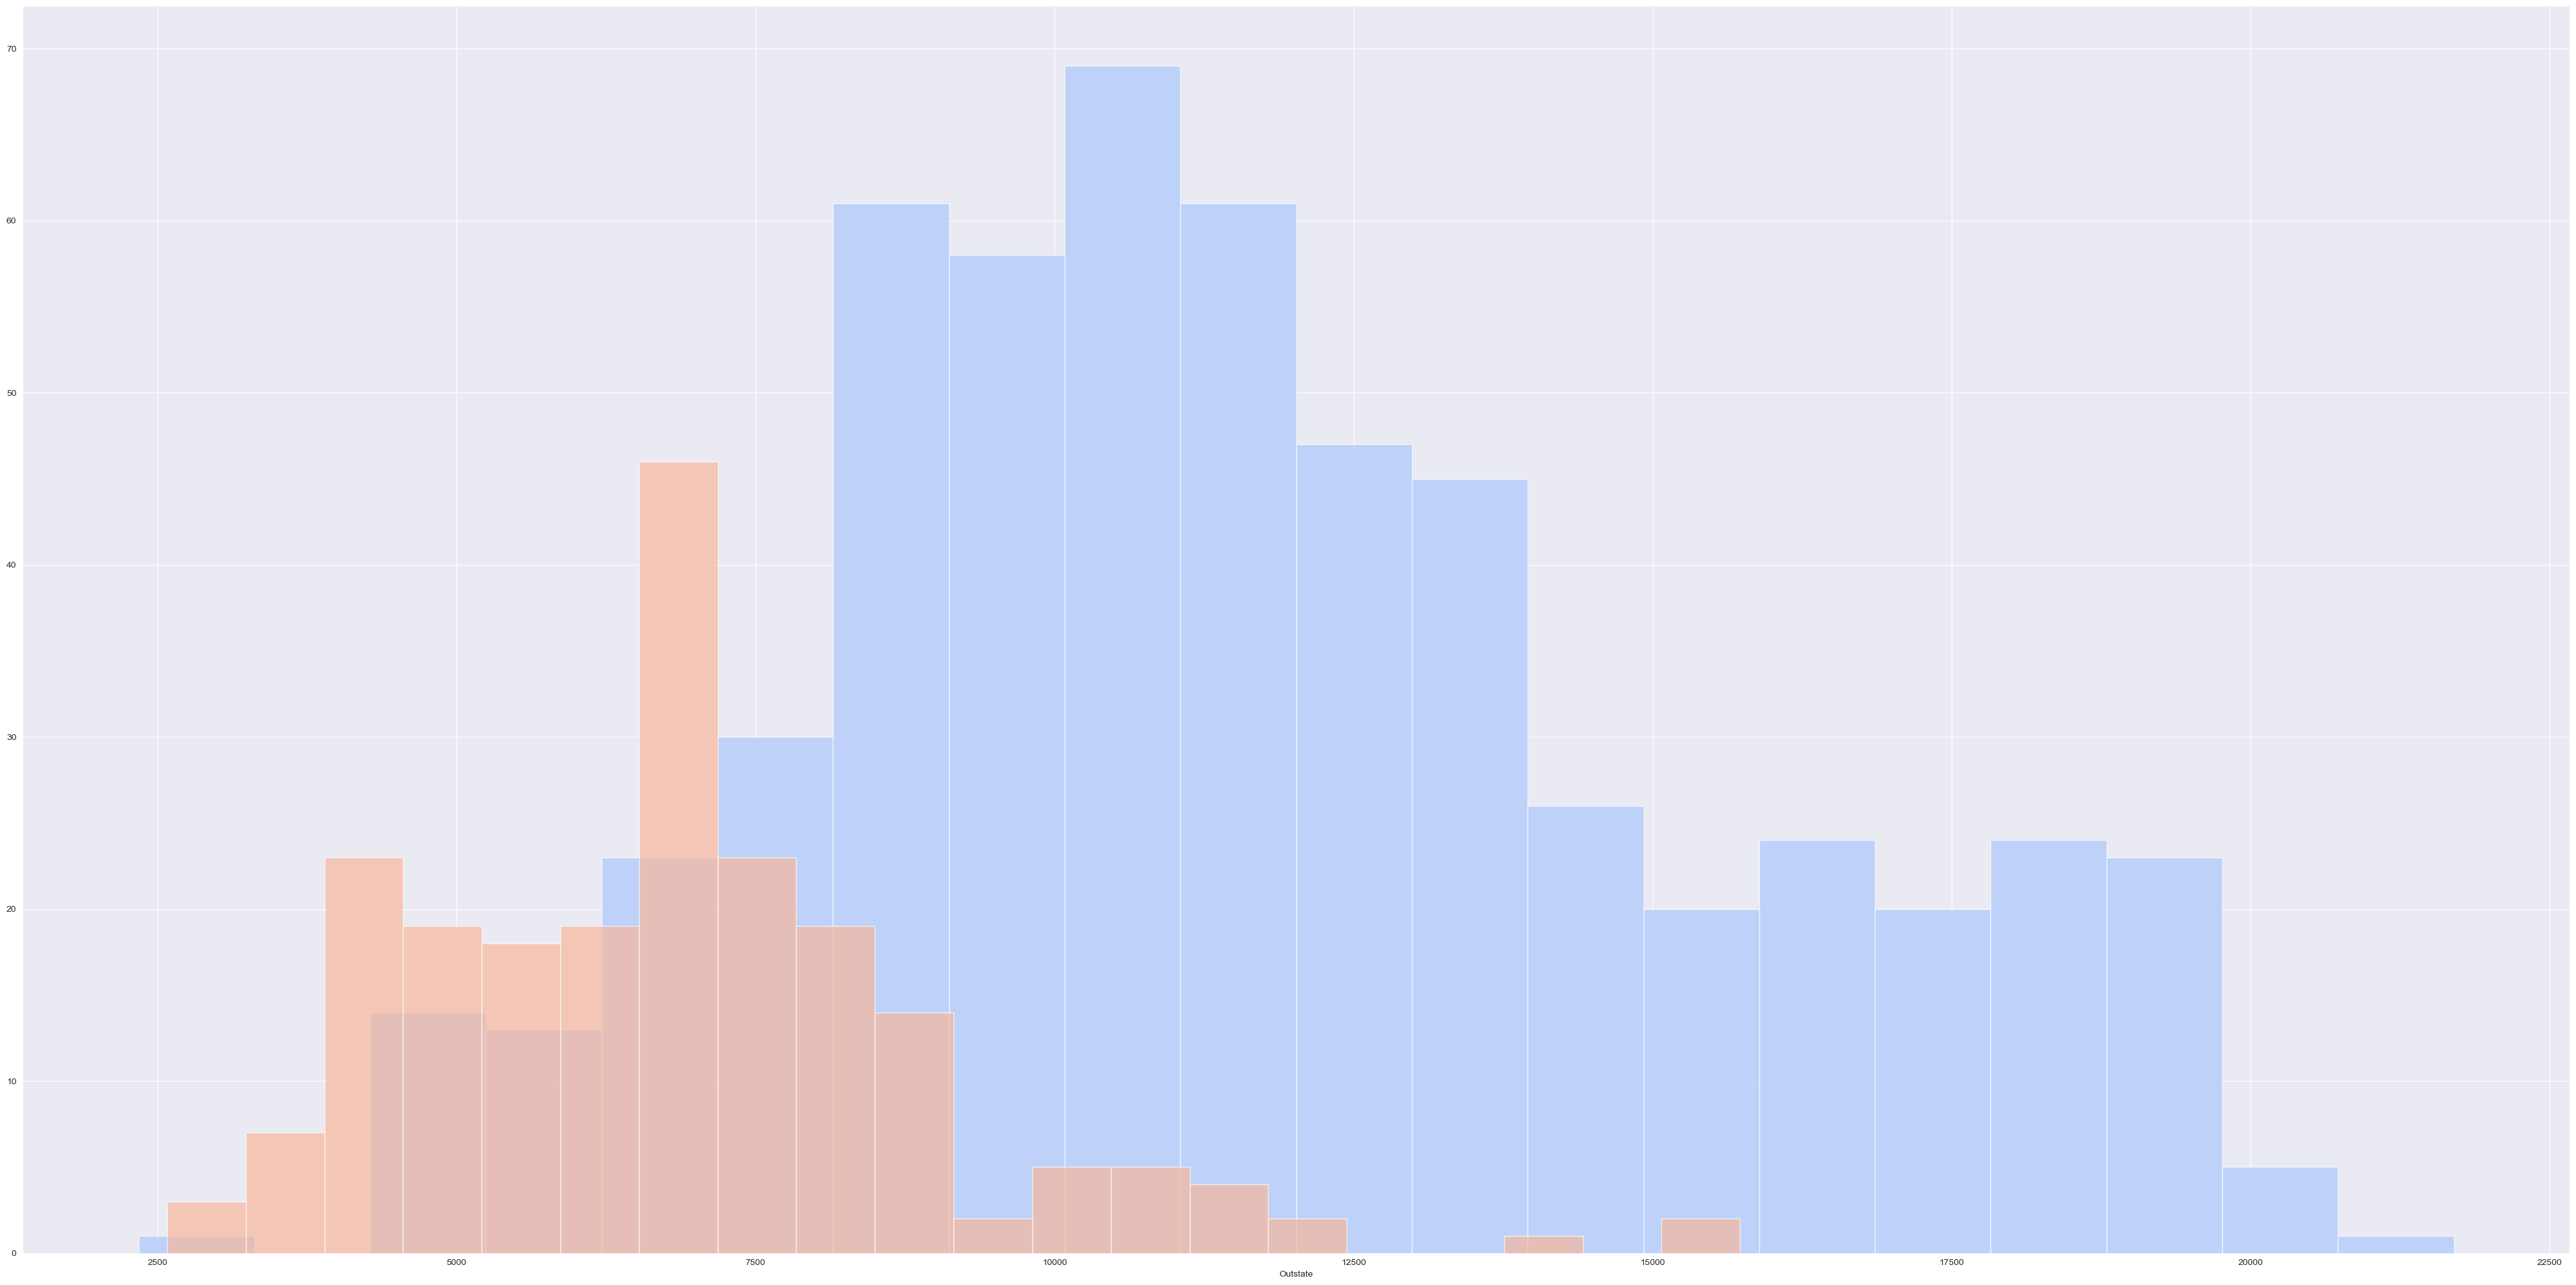

In [69]:
import seaborn as sns

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',size=20,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

#sns.set_style('darkgrid')
#g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)


In [70]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [71]:
df['cluster']= df['Private'].apply(converter)

In [72]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [73]:
X=df.drop(['Private', 'cluster'], axis=1)
y=df['cluster']

In [74]:
X

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.3, random_state=101)

In [79]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.5843864379722237

In [80]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train, y_train)
pred_=log.predict(X_test)
log.score(X_test,y_test)

c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9264705882352942

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(X_train, y_train)
pred_1=dt.predict(X_test)
dt.score(X_test, y_test)

0.9227941176470589

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=6)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)
rf.score(X_test, y_test)

0.9099264705882353

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

0.9356617647058824

In [88]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)
sv.predict(X_test)
sv.score(X_test, y_test)

0.9338235294117647

In [89]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(X_train, y_train)
sv.predict(X_test)
sv.score(X_test, y_test)

0.9338235294117647

In [90]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(X_train, y_train)
sv.predict(X_test)
sv.score(X_test, y_test)

0.9283088235294118

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid={'C': [0.1,1,10,100],
            'gamma':[1.0, 1.0, 0.01, 0.001]}

grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1.0, 1.0, 0.01, 0.001]},
             verbose=2)

In [96]:
pre=grid.predict(X_test)
grid.score(X_test, y_test)

0.7334558823529411

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.73      1.00      0.85       399

    accuracy                           0.73       544
   macro avg       0.37      0.50      0.42       544
weighted avg       0.54      0.73      0.62       544



c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
error=[]
krange=range(1,40)

for i in krange:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(X_test)
    error.append(np.mean(y_test != pred))

c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

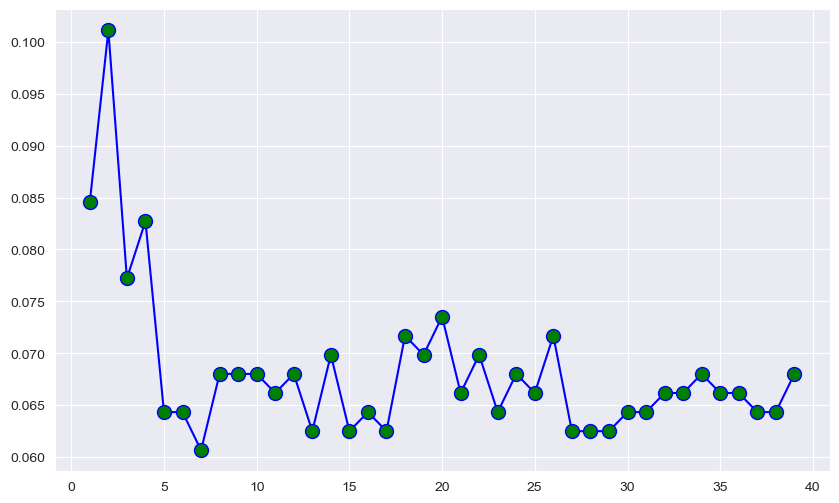

In [101]:
plt.figure(figsize=(10,6))
plt.plot(krange, error, color='blue', marker='o', markersize=10, markerfacecolor='green')